# Introduction to Pandas and DataFrame Structure
_In this first part, the principles of pandas are discussed, such as its structure, its attributes, the libraries to be used and its main DataFrame and Series components. You will learn about DataFrames and Series manipulation.._

---

## Contents
1. **Introduction**  
   - Pandas, Numpy and Matplotlib
   - Datasets important information
2. **Key Concepts**  
   - The Pandas DataFrame
     - Anatomy
     - Attributes
     - Data Types
     - Selecting a Column
     - Renaming Column Names 
     - Creating and deleting columns
    
3. **Practical Exercises**  
   Explanation of what the user will learn in this section.

---

## Datasets Used
- [disham993/9000-movies-dataset](https://www.kaggle.com/datasets/disham993/9000-movies-dataset)  
### About Dataset

#### Context
This is the first dataset published for public use, aimed at building a movie recommender system using Natural Language Processing and Machine Learning models. It is specifically created for learners who want to explore Data Science and Machine Learning.

#### Content
##### Features of the dataset:
- **Release_Date**: Date when the movie was released.
- **Title**: Name of the movie.
- **Overview**: Brief summary of the movie.
- **Popularity**: A metric computed by TMDB based on views, votes, favorites, and more.
- **Vote_Count**: Total number of votes received from viewers.
- **Vote_Average**: Average rating based on vote count and number of viewers (out of 10).
- **Original_Language**: Original language of the movie (dubbed versions are excluded).
- **Genre**: Categories the movie belongs to.
- **Poster_Url**: URL of the movie poster.

#### Acknowledgements
Special thanks to Mr. Nitish Singh from CampusX (https://www.youtube.com/channel/UCCWi3hpnq_Pe03nGxuS7isg) for creating easy-to-follow tutorials.

#### Inspiration
A recommender system can be built using this CSV data.

#### Source
The data was fetched using the API from [The Movie Database](https://developers.themoviedb.org/3/movies/get-popular-movies) and cleaned using Pandas and Numpy libraries in Python.

---

## Author
**Author Name:** Juan Alejandro Carrillo Jaimes 

**Contact:** [jalejandrocjaimes@gmail.com](mailto:jalejandrocjaimes@gmail.com) - [Linkedin-AlejoCJaimes31](https://www.linkedin.com/in/alejocjaimes31/)

**Purpose:** This content was created as an educational resource for university students.

---

# 1. Introduction
The **goal** of this chapter is to introduce a foundation of pandas by thoroughly inspecting the DataFrame data structures. It is important for pandas users to know the difference between a Series and DataFrame.

In this chapter, you **will learn** how to select a single column, multiple column of data from a DataFrame ( a two-dimensional dataset).

## Summary: Pandas, Numpy, and Matplotlib


## Pandas
<p align="center">
  <img src="https://cdn.sanity.io/images/oaglaatp/production/8898c481fb41f4f3ae01a6b7a9f6442ecbea0841-1200x800.png?w=1200&h=800&auto=format" width="500" height="300"/>
</p>

Pandas is a Python library that provides data structures and tools for efficiently analyzing and manipulating data. Its two main structures are:
- **DataFrame**: A two-dimensional table, similar to a spreadsheet, that allows for storing data of different types.
- **Series**: A column of data in a DataFrame, similar to a Python list.

### Why is it important?
Pandas makes data manipulation and analysis easy, from cleaning to analysis and visualization. Its ability to handle large datasets and its user-friendly nature make it essential in data science projects.

### Code
```py
import pandas as pd
```
____

## Numpy
<p align="center">
  <img src="https://media2.dev.to/dynamic/image/width=1280,height=720,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Farticles%2Fsi1cg2saozslnjv6fnfy.png" width="500" height="300"/>
</p>

Numpy is a fundamental library for scientific computing in Python. It provides an efficient **array** object for multidimensional arrays and a set of mathematical and statistical functions.

### Why is it important?
Numpy is crucial because it enables performing complex mathematical operations quickly and efficiently. It forms the basis for many other Python libraries, such as Pandas and SciPy, and is widely used in fields ranging from engineering to computational biology.

### Code
```py
import numpy as np
```
____

## Matploblib
<p align="center">
  <img src="https://interactivechaos.com/sites/default/files/inline-images/tutorial_matplotlib.png" width="500" height="300"/>
</p>

Matplotlib is a Python library for data visualization. It allows for the creation of static, animated, and interactive plots, making it easier to understand and present complex data.

### Why is it important?
Matplotlib is essential for creating clear and effective visualizations that help interpret and communicate results in data science projects. It works well with many other Python libraries and adapts to various types of charts and presentations.

### Code
```py
import matplotlib.pyplot as plt
```


# Datasets Important Information
Before to start, its neccesary create account on https://www.kaggle.com/, and set up your Api Keys ([Here's how to set up yout API Keys](https://www.kaggle.com/docs/api#authentication))

## Installation Kaggle API
Ensure you have Python 3 and the package manager pip installed.

```py
pip install kaggle
```

## Set up Api Keys
1. Go to profile, and select Settings option

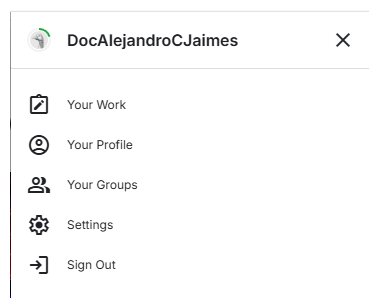

2. Navigate to the section API, and select **Create New Token**

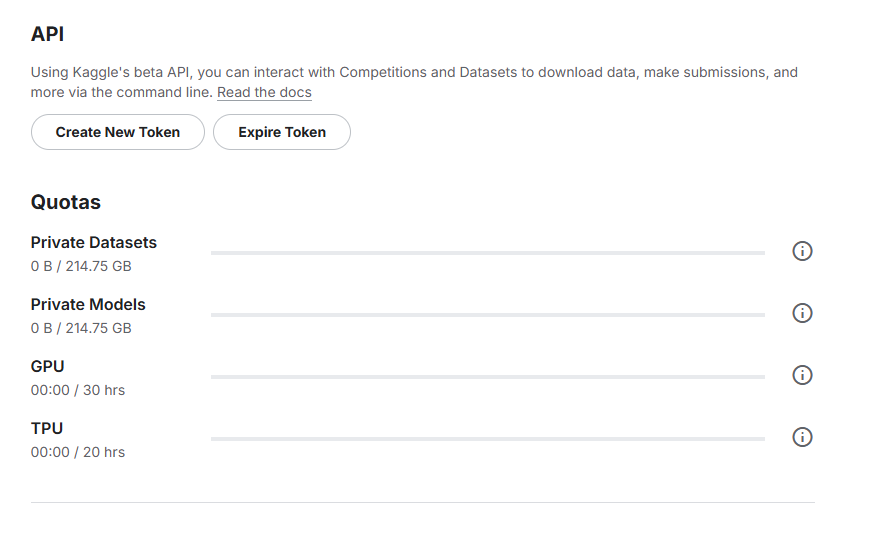

3. This download you automatically a json file called **kaggle.json** (Save this in safe place, avoid losing it).

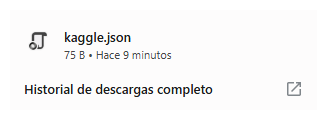

4. Put the file **kaggle.json** in the source path C:\Users\<TuUsuario>\.kaggle\ (if you are using Windows). 

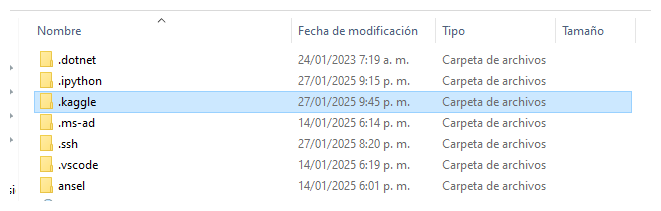

Note: If you dont have this dir, create it.

5. Test the authentication API

```py
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
```

6. Import and download dataset

```py
# Download the dataset
api.dataset_download_files('disham993/9000-movies-dataset', path='movies-kaggle-df', unzip=True)

```


In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi # type: ignore

# Authenticate with the Kaggle API
api = KaggleApi()
api.authenticate()

In [3]:
# Download the dataset
api.dataset_download_files('disham993/9000-movies-dataset', path='../datasets/movies-kaggle-df', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/disham993/9000-movies-dataset


# 2. Key concepts

In [4]:
# import the principal libraries
import pandas as pd
import numpy as np
import matplotlib

## 2. The Pandas DataFrame
### 2.1 Anatomy of DataFrame

In [5]:
# read file
path_file = '../datasets/movies-kaggle-df/mymoviedb.csv'
'''
Normally you can read it, with the following code:
movies = pd.read_csv(path_file)
but, in this case the file is corrupted, so we need to use the following code:
'''
movies = pd.read_csv(path_file, engine='python', on_bad_lines='skip', quotechar='"')

In [6]:
movies

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


Before diving deep into pandas, it is worth knowing the components of the DataFrame.

Let's look at the main components that appear in the table.

Data table consisting of rows and columns.


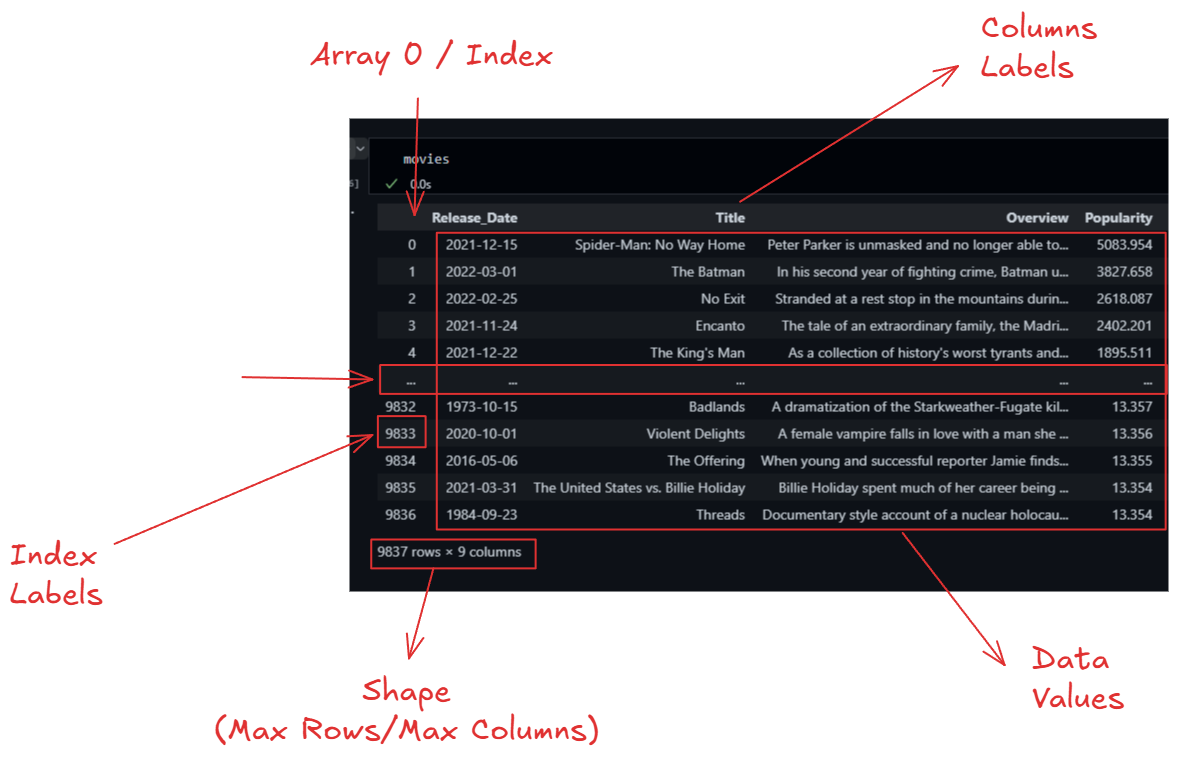

#### How it works?

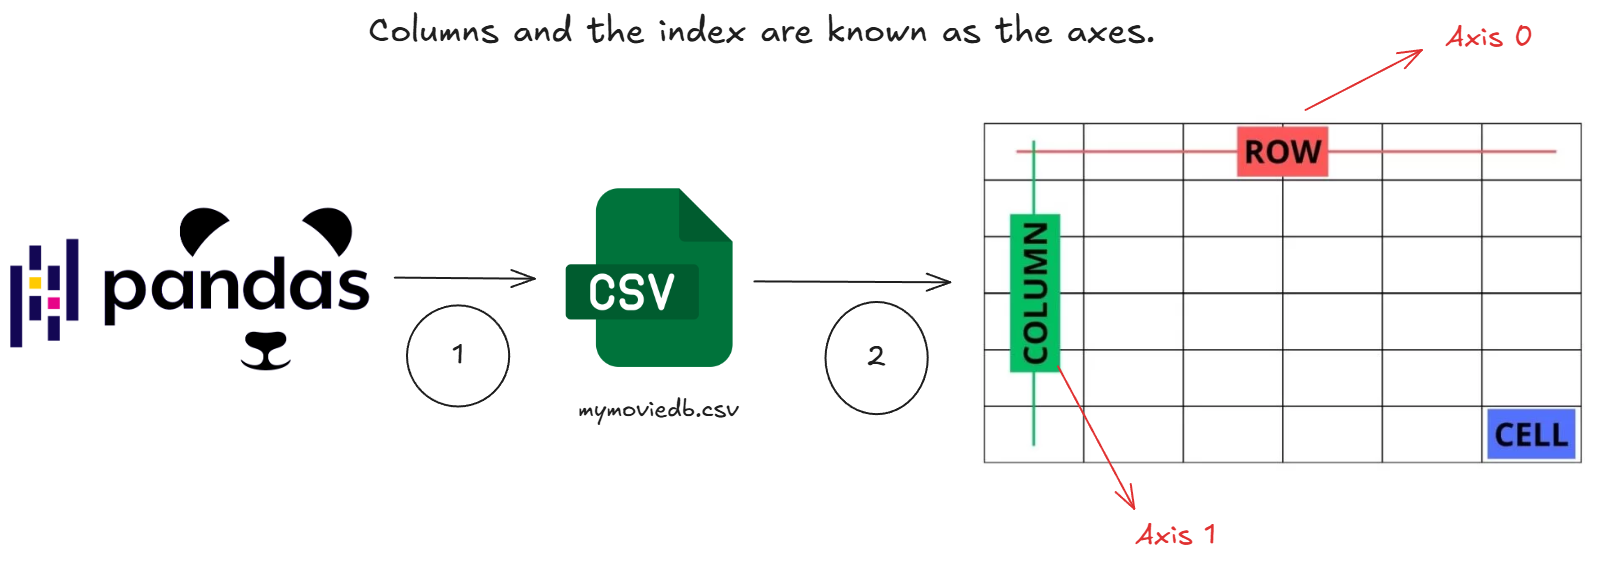

Pandas using the `read_csv` function. First read the data from disk into memory and into a DataFrame.

The columns and the index are known as the axes. The index is **axis 0**, and the columns are the **axis 1**

**Important fact:** By default, Panads shows 60 rows and 20 columns. 


### 2.2 Attributes of DataFrame

####  Columns (`df.columns`)
Returns the column labels of the DataFrame as an `Index` object.

In [7]:
columns = movies.columns
columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

####  Index (`df.index`)
Returns the row labels (index) of the DataFrame.

Index objects are implemented using hash tables that allow for every fast selection and data alignment.

The index and the columns are closely related. Both of them are subclasses of `Index`

**Important fact:** There are many types od index objects in pandas. If you do not specify the index, pandas will use a `RangeIndex`.
A `RangeIndex` is a subclass of an `Index` which is similar to `Python's range object`.

In [8]:
index = movies.index
str_type_index = type(index)
is_column_subclass_from_index = issubclass(columns.__class__, pd.Index)
print(f'Index movies: {index}\n Index Type: {str_type_index}\n Is column subclass from index: {is_column_subclass_from_index}')

Index movies: RangeIndex(start=0, stop=9837, step=1)
 Index Type: <class 'pandas.core.indexes.range.RangeIndex'>
 Is column subclass from index: True


####  Numpy data (`df.to_numpy()`)
Beneath the index, columns, and data are NumPy `ndarrays`. They could be considered the **base** object for pandas that many ohter objects are built upon.

When we try use `.values` DataFrame attribute this returned a NumPy n-dimensional array or `ndarray`.

In [9]:
print("===DATAFRAME VALUES===")
print(movies.values)
print("===DATAFRAME INDEX===")
print(index.to_numpy())
print("===DATAFRAME COLUMNS===")
print(columns.to_numpy())

===DATAFRAME VALUES===
[['2021-12-15' 'Spider-Man: No Way Home'
  'Peter Parker is unmasked and no longer able to separate his normal life from the high-stakes of being a super-hero. When he asks for help from Doctor Strange the stakes become even more dangerous, forcing him to discover what it truly means to be Spider-Man.'
  ... 'en' 'Action, Adventure, Science Fiction'
  'https://image.tmdb.org/t/p/original/1g0dhYtq4irTY1GPXvft6k4YLjm.jpg']
 ['2022-03-01' 'The Batman'
  'In his second year of fighting crime, Batman uncovers corruption in Gotham City that connects to his own family while facing a serial killer known as the Riddler.'
  ... 'en' 'Crime, Mystery, Thriller'
  'https://image.tmdb.org/t/p/original/74xTEgt7R36Fpooo50r9T25onhq.jpg']
 ['2022-02-25' 'No Exit'
  'Stranded at a rest stop in the mountains during a blizzard, a recovering addict discovers a kidnapped child hidden in a car belonging to one of the people inside the building which sets her on a terrifying struggle to 

### 2.3 Data Types

#### **Data Classification**  

In general terms, data is divided into two main categories:  

1. **Continuous Data**  
2. **Categorical Data**  

Categorical data can be further divided into:  
   - **Nominal Data**  
   - **Ordinal Data**  

---

##### **1. Continuous Data**  
These are **numerical values** that can take an infinite number of values within a range. They represent **measurements** and can have decimal points.  

✅ **Examples:**  
   - **Height of a person:** 1.65 m, 1.70 m, 1.75 m  
   - **Weight of an object:** 2.3 kg, 5.75 kg, 10.12 kg  
   - **Temperature:** 22.5°C, 30.8°C, 15.3°C  
   - **Monthly salary:** $1500.50, $3200.75  

📌 **Code example**  
```python
import pandas as pd

# Continuous data
df = pd.DataFrame({
    'Name': ['Ana', 'Carlos', 'Luis'],
    'Height (m)': [1.65, 1.80, 1.75],
    'Salary ($)': [2500.50, 3200.75, 2800.00]
})

print(df)
```

---

##### **2. Categorical Data**  
These are **qualitative** values that represent characteristics or labels instead of numbers. They do not have a meaningful numerical interpretation.  

**A. Nominal Data**  
These are labels or categories **without a specific order**.  

✅ **Examples:**  
   - **Car color:** Red, Blue, Green  
   - **Pet type:** Dog, Cat, Fish  
   - **Cereal brand:** Frosted Flakes, Corn Flakes, Cheerios  

📌 **Code example**  
```python
df = pd.DataFrame({
    'Name': ['Ana', 'Carlos', 'Luis'],
    'Favorite Color': ['Red', 'Blue', 'Green']
})

print(df)
```

**B. Ordinal Data**  
These are categories that **have an order or hierarchy**, but the difference between them is not necessarily uniform.  

✅ **Examples:**  
   - **Satisfaction level:** Low, Medium, High  
   - **Clothing size:** Small, Medium, Large  
   - **Education level:** Primary, Secondary, University  

📌 **Example in Python (with ordered categorical data):**  
```python
from pandas.api.types import CategoricalDtype

order = CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

df = pd.DataFrame({
    'Customer': ['Ana', 'Carlos', 'Luis'],
    'Satisfaction': ['High', 'Medium', 'Low']
})

df['Satisfaction'] = df['Satisfaction'].astype(order)

print(df)
```

---
 **📌 Remember**  
| **Data Type**        | **Example**                   | **Is it numerical?** | **Does it have an order?** |
|---------------------|---------------------------|-------------------|------------------|
| **Continuous**      | Height (1.75 m), Weight (70.5 kg) | ✅ Yes | ⚠️ Not always |
| **Categorical Nominal** | Color (Red, Blue), Brand (Nike, Adidas) | ❌ No | ❌ No |
| **Categorical Ordinal** | Size (S, M, L), Level (Low, Medium, High) | ❌ No | ✅ Yes |


#### **Common Pandas Data types**   

1. **float**: The numpy float type, which supports missing values.
2. **int**: The numpy integer type, which ***does not support missing values***.
3. **Int64**: Pandas **nullable** integer type.
4. **object**: The NumPy type for storing strings (and mixed types).
5. **category**: Pandas categorical type, which ***does support missing values***.
6. **bool**: the NumPy Boolean type, which ***does not support missing values*** (None becomes False, `np.nan becomes True)
7. **boolean**: Pandas **nullable** Boolean type.
8. **datetime64 [ns]**: The NumPy data type, which ***does support missing values*** (NaT)


In [10]:
# Use the .dtypes attribute to display each column name along with its data type
print("===DATAFRAME DTYPE===")
print(movies.dtypes)

===DATAFRAME DTYPE===
Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count            object
Vote_Average          object
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object


In [11]:
# Use the .value_counts() method to return the counts of each data type
print("===DATAFRAME VALUE COUNTS===")
print(movies.dtypes.value_counts())

===DATAFRAME VALUE COUNTS===
object     8
float64    1
Name: count, dtype: int64


In [12]:
# Use the .info() method to return the counts of non-null values
print("===DATAFRAME INFO===")
print(movies.info())

===DATAFRAME INFO===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB
None


#### How it works?

`.value_counts` returns the count of all the data types in the DataFrame when called on the .dtypes attributes.

`object` data type is the one data type that is unlike the others. May containt values that are of any valid Python object. **Usually** when a column ins of the `object` data type, it signals that the entire column is strings.

`.info()` print the data information in addition to the count of **non-null** values. Its also list the amount of memory used by the DataFrame.

**Important fact:** The `.dtypes` attribute returns a pandas `Series` if you needed to use the data.

```py
pd.Series(['Loan', np.nan, 'Sthepanie']).dtype
```

### 2.4 Selecting Columns

Select a single column returns a `Series`

In [13]:
# conserve the same index
# you can use two annotations use the brackets or the dot notation
movies.Vote_Count
#movies['Vote_Count']

0       8940
1       1151
2        122
3       5076
4       1793
        ... 
9832     896
9833       8
9834      94
9835     152
9836     186
Name: Vote_Count, Length: 9837, dtype: object

Select two columns or more returns a `DataFrame` in **Pandas**, you can use `.loc[]` and `.iloc[]` to extract a **Series** from a **DataFrame** based on labels or positions.  

---

#### **Using `.loc[]` (Label-based selection)**
- Used to select rows and columns by their **labels**.
- Syntax:  
  ```python
  df.loc[row_label, column_label]
  ```
- If you select only one column, it returns a **Series**.

📌 **Example:**  
```python
import pandas as pd

# Sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'Salary': [50000, 60000, 70000]}

df = pd.DataFrame(data, index=['A', 'B', 'C'])

# Selecting a single column (returns a Series)
age_series = df.loc[:, 'Age']
print(age_series)
```
**Output (Series):**  
```
A    25
B    30
C    35
Name: Age, dtype: int64
```

---

#### **Using `.iloc[]` (Position-based selection)**
- Used to select rows and columns by their **integer index positions**.
- Syntax:  
  ```python
  df.iloc[row_index, column_index]
  ```
- If you select only one column, it returns a **Series**.

📌 **Code example:**  
```python
# Selecting the first column (index 1 = 'Age')
age_series = df.iloc[:, 1]
print(age_series)
```
**Output (Series):**  
```
A    25
B    30
C    35
Name: Age, dtype: int64
```

---

#### **📌 Key Differences**
| Attribute | Selection Type | Example |
|-----------|--------------|---------|
| `.loc[]` | Label-based | `df.loc[:, 'Age']` |
| `.iloc[]` | Position-based | `df.iloc[:, 1]` |


**Important fact:** 

- **Use** `.loc` when you want to select data using labels (row and column names).
- **Use** `.iloc` when you want to select data using integer positions (row and column indexes).
- The `.iloc` method used numerical column selector, mean while `.loc` is label-based selector instead numerical column selector, you can use the *name_column*

In [14]:
movies.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

- Select the first 8 rows of the columns Release_Date, Title, Original_Language

In [15]:
movies.loc[:8, ['Release_Date', 'Title', 'Original_Language']]

,Release_Date,Title,Original_Language
0,2021-12-15,Spider-Man: No Way Home,en
1,2022-03-01,The Batman,en
2,2022-02-25,No Exit,en
3,2021-11-24,Encanto,en
4,2021-12-22,The King's Man,en
5,2022-01-07,The Commando,en
6,2022-01-12,Scream,en
7,2022-02-10,Kimi,en
8,2022-02-17,Fistful of Vengeance,en


- Select the columns index from 5 to 8 and display the last 5 results.

In [16]:
movies.iloc[-5:, 5:8]

,Vote_Average,Original_Language,Genre
9832,7.6,en,"Drama, Crime"
9833,3.5,es,Horror
9834,5.0,en,"Mystery, Thriller, Horror"
9835,6.7,en,"Music, Drama, History"
9836,7.8,en,"War, Drama, Science Fiction"


- Select the first 10 rows and only the columns Title and Vote_Average

In [17]:
movies.loc[:10, ['Title','Vote_Average']]

,Title,Vote_Average
0,Spider-Man: No Way Home,8.3
1,The Batman,8.1
2,No Exit,6.3
3,Encanto,7.7
4,The King's Man,7.0
5,The Commando,6.6
6,Scream,6.8
7,Kimi,6.3
8,Fistful of Vengeance,5.3
9,Eternals,7.2


- Select movies where **Vote_Average** is greater than 8.0, showing only Title and Genre.

In [18]:
# Convert objects columns to numeric
movies["Vote_Average"] = pd.to_numeric(movies["Vote_Average"], errors="coerce")
movies["Vote_Count"] = pd.to_numeric(movies["Vote_Count"], errors="coerce")

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.8+ KB


In [20]:
movies.loc[movies['Vote_Average'] > 8.0 , ['Title', 'Genre']]

,Title,Genre
0,Spider-Man: No Way Home,"Action, Adventure, Science Fiction"
1,The Batman,"Crime, Mystery, Thriller"
20,Sing 2,"Animation, Comedy, Family, Music"
28,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,"Animation, Action, Adventure, Fantasy"
44,Turning Red,"Animation, Family, Comedy, Fantasy"
...,...,...
9383,Bruce Lee: The Legend,Documentary
9401,Kung Fu Master Huo Yuanjia,"Action, Drama"
9412,A Dog's Will,"Adventure, Comedy"
9783,Rashomon,"Crime, Drama, Mystery"


- Select every second row (step = 2) and only Title, Popularity, and Vote_Count

In [21]:
movies.loc[::2, ['Title', 'Popularity', 'Vote_Count']]

,Title,Popularity,Vote_Count
0,Spider-Man: No Way Home,5083.954,8940.0
2,No Exit,2618.087,122.0
4,The King's Man,1895.511,1793.0
6,Scream,1675.161,821.0
8,Fistful of Vengeance,1594.013,114.0
...,...,...,...
9828,All Is Lost,13.359,1319.0
9830,Unlawful Entry,13.358,199.0
9832,Badlands,13.357,896.0
9834,The Offering,13.355,94.0


#### How it works?

Pandas DataFrame has mutiple columns. Each of these columns can be pulled out ant threated as a `Series`.

Selecting column names using the index operator ([) will work with any column name. You can also create and updae columns with this operator.

What is a valid Python attribute? A sequence of alphanumerics that starts with a character and includes underscores.


### 2.5 Renaming Columns

Renaming columns in a DataFrame is important for several reasons

1. **Clarity & Readability** – Meaningful column names make data easier to understand and work with.
   ```python
   df.rename(columns={'col1': 'CustomerID', 'col2': 'OrderDate'}, inplace=True)
   ```
2. **Standardization** – Ensures consistency, especially when merging multiple datasets.
   ```python
   df.columns = df.columns.str.lower().str.replace(' ', '_')  # Standardizing to lowercase with underscores
   ```

3. **Avoiding Conflicts** – Prevents issues with reserved words or duplicate column names.
   ```python
   df.rename(columns={'class': 'student_class'}, inplace=True)  # Avoids conflict with Python's `class` keyword
   ```

4. **Easier Data Manipulation** – Makes filtering, grouping, and aggregating more intuitive.
   ```python
   df.groupby('category').sum()  # Works better with clear column names
   ```

5. **Improving Code Maintenance** – Clean, well-named columns make future modifications easier.

In [22]:
movies.columns.to_numpy()

array(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype=object)

#### Examples

- Standarizing column names to lower case and replace spaces by underscore.

In [23]:
movies.columns = movies.columns.str.lower().str.replace(' ', '_')
movies.columns.to_numpy()

array(['release_date', 'title', 'overview', 'popularity', 'vote_count',
       'vote_average', 'original_language', 'genre', 'poster_url'],
      dtype=object)

- Rename the next columns:
  - `title` to `movie_title`
  - `vote_count` to `total_votes_received`
  - `vote_average` to `rating`

In [24]:
new_columns = {'title': 'movie_title', 'vote_count': 'total_votes_received', 'vote_average': 'rating'}
movies.rename(columns=new_columns, inplace=True)
movies.columns.to_numpy()

array(['release_date', 'movie_title', 'overview', 'popularity',
       'total_votes_received', 'rating', 'original_language', 'genre',
       'poster_url'], dtype=object)

### 2.6 Creating and deleting columns

#### Create Columns

During data analysis, it is likely that you will need to create new columns to represent new variables. Commonly, these new columns will be created from previus columns already in the dataset, pandas has a few differentways to add new columns to a DataFrame.

First form is create a new column to do an index assignment, this mutate the existing DataFrame

In [50]:
movies_copy = movies.copy()

In [51]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date          9837 non-null   object 
 1   movie_title           9828 non-null   object 
 2   overview              9828 non-null   object 
 3   popularity            9827 non-null   float64
 4   total_votes_received  9826 non-null   float64
 5   rating                9826 non-null   float64
 6   original_language     9827 non-null   object 
 7   genre                 9826 non-null   object 
 8   poster_url            9826 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.8+ KB


In [52]:
movies_copy['release_date'] = pd.to_datetime(movies_copy['release_date'], errors='coerce')

In [53]:
#movies_copy['original_language'].apply(lambda x: x == 'en')
movies_copy['available_in_english'] = "NO"

In [54]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          9827 non-null   datetime64[ns]
 1   movie_title           9828 non-null   object        
 2   overview              9828 non-null   object        
 3   popularity            9827 non-null   float64       
 4   total_votes_received  9826 non-null   float64       
 5   rating                9826 non-null   float64       
 6   original_language     9827 non-null   object        
 7   genre                 9826 non-null   object        
 8   poster_url            9826 non-null   object        
 9   available_in_english  9837 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 768.6+ KB


In [55]:
movies_copy.assign(available_in_english = "NO").head(2)

,release_date,movie_title,overview,popularity,total_votes_received,rating,original_language,genre,poster_url,available_in_english
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,NO
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,NO


In [56]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          9827 non-null   datetime64[ns]
 1   movie_title           9828 non-null   object        
 2   overview              9828 non-null   object        
 3   popularity            9827 non-null   float64       
 4   total_votes_received  9826 non-null   float64       
 5   rating                9826 non-null   float64       
 6   original_language     9827 non-null   object        
 7   genre                 9826 non-null   object        
 8   poster_url            9826 non-null   object        
 9   available_in_english  9837 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 768.6+ KB


In [57]:
# create a column year published
movies_copy['year_published'] = movies_copy['release_date'].dt.year

In [58]:
movies_copy.head(2)

,release_date,movie_title,overview,popularity,total_votes_received,rating,original_language,genre,poster_url,available_in_english,year_published
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,NO,2021.0
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,NO,2022.0


In [59]:
# count a number of movies per year
count_years = movies_copy['year_published'].value_counts()
count_years.head()

year_published
2021.0    714
2018.0    530
2017.0    510
2019.0    500
2016.0    470
Name: count, dtype: int64

In [60]:
print(count_years.__class__)

<class 'pandas.core.series.Series'>


In [61]:
# assing this series a new column
movies_copy = movies_copy.assign(number_movies_per_year = count_years)

In [62]:
(
    movies_copy.assign(number_movies_per_year = count_years) ['number_movies_per_year'] \
        .isna() \
        .sum()
)

np.int64(9735)

In [63]:
movies_copy.count()

release_date              9827
movie_title               9828
overview                  9828
popularity                9827
total_votes_received      9826
rating                    9826
original_language         9827
genre                     9826
poster_url                9826
available_in_english      9837
year_published            9827
number_movies_per_year     102
dtype: int64

In [64]:
movies_copy['original_language'] = movies_copy['original_language'].str.upper()

In [65]:
movies_copy.head()

,release_date,movie_title,overview,popularity,total_votes_received,rating,original_language,genre,poster_url,available_in_english,year_published,number_movies_per_year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,EN,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,NO,2021.0,NaN
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,EN,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,NO,2022.0,NaN
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,EN,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,NO,2022.0,NaN
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,EN,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,NO,2021.0,NaN
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,EN,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,NO,2021.0,NaN


In [66]:
def classify_common_language(df:pd.DataFrame) -> pd.DataFrame:
    common_languages = ['EN', 'ES', 'FR', 'RU', 'JA']
    return (
        df['original_language'].isin(common_languages)
    )

In [67]:
# Create the column common_language_available
# The common languages are EN, ES, FR, RU, JA
movies_copy = movies_copy.assign(
    common_language_available = classify_common_language(movies_copy)
    )

In [71]:
movies_copy.sample(n=4, random_state=42)

,release_date,movie_title,overview,popularity,total_votes_received,rating,original_language,genre,poster_url,available_in_english,year_published,number_movies_per_year,common_language_available
9135,2017-12-14,Steel Rain,"Amid a coup, a North Korean agent escapes sout...",14.025,120.0,7.3,KO,"Action, Thriller",https://image.tmdb.org/t/p/original/zCXpkcMAUx...,NO,2017.0,NaN,False
4252,1995-04-21,While You Were Sleeping,A transit worker pulls commuter Peter off rail...,23.489,1321.0,6.9,EN,"Romance, Comedy",https://image.tmdb.org/t/p/original/qNGO3ETcNw...,NO,1995.0,NaN,True
3662,2020-09-18,Violet Evergarden: The Movie,As the world moves on from the war and technol...,26.171,195.0,8.7,JA,"Animation, Fantasy, Romance, Drama",https://image.tmdb.org/t/p/original/bajajkoErD...,NO,2020.0,NaN,True
6454,1996-06-28,Striptease,"Bounced from her job, Erin Grant needs money i...",17.670,845.0,5.6,EN,"Comedy, Crime, Drama",https://image.tmdb.org/t/p/original/4zMy6R7aco...,NO,1996.0,NaN,True


We can check in boolean columns, if all values are `True` with the function **.all()**

In [72]:
com_lg_ser = movies_copy['common_language_available']
com_lg_ser.value_counts()

common_language_available
True     8928
False     909
Name: count, dtype: int64

In [73]:
com_lg_ser.all()

np.False_

To insert a column in a specific position in a Pandas DataFrame, you can use the `insert()` method. The `insert()` method allows you to specify the index (position) where you want to insert the column.

**Syntax**:
```python
DataFrame.insert(loc, column, value, allow_duplicates=False)
```

**Parameters**:
- **`loc`**: The position (index) at which the column should be inserted.
- **`column`**: The name of the new column.
- **`value`**: The data (values) to populate in the new column. This can be a list, Series, or any array-like structure.
- **`allow_duplicates`**: Whether to allow inserting a column with a name that already exists. Default is `False`.

In [75]:
# rating is higher than the average
average_rating = movies_copy['rating'].mean()
print(f'Average rating: {average_rating}')

Average rating: 6.4394667209444325


In [77]:
# insert new column next to rating columng
avg_rating_index = movies_copy.columns.get_loc('rating') + 1

movies_copy.insert(
    loc=avg_rating_index,
    column='rating_above_average',
    value=movies_copy['rating'] > average_rating
    
)
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   release_date               9827 non-null   datetime64[ns]
 1   movie_title                9828 non-null   object        
 2   overview                   9828 non-null   object        
 3   popularity                 9827 non-null   float64       
 4   total_votes_received       9826 non-null   float64       
 5   rating                     9826 non-null   float64       
 6   rating_above_average       9837 non-null   bool          
 7   original_language          9827 non-null   object        
 8   genre                      9826 non-null   object        
 9   poster_url                 9826 non-null   object        
 10  available_in_english       9837 non-null   object        
 11  year_published             9827 non-null   float64       
 12  number

In [79]:
movies_copy.loc[:, ['movie_title', 'rating', 'rating_above_average']].sample(n=5, random_state=42)

,movie_title,rating,rating_above_average
9135,Steel Rain,7.3,True
4252,While You Were Sleeping,6.9,True
3662,Violet Evergarden: The Movie,8.7,True
6454,Striptease,5.6,False
518,Zootopia,7.7,True


#### Drop Columns

Both the `del` statement and the `drop()` method can be used to delete columns from a Pandas DataFrame, but they have different behaviors, parameters, and use cases. Here's a detailed comparison and explanation of each method.

##### **`del` Statement**

The `del` statement is a Python built-in that allows you to remove an element (in this case, a column) from a DataFrame directly. It modifies the DataFrame **in-place**.

**Syntax**:
```python
del DataFrame['column_name']
```

**Characteristics**:
- **In-place operation**: `del` modifies the DataFrame directly.
- **Single column deletion**: It can only delete one column at a time.
- **No return value**: `del` does not return a DataFrame; it modifies the original DataFrame.
- **No flexibility for multi-column deletion**: Cannot remove multiple columns at once without chaining or using loops.
- **Raises an error**: If the column name does not exist, it raises a `KeyError`.

In [80]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   release_date               9827 non-null   datetime64[ns]
 1   movie_title                9828 non-null   object        
 2   overview                   9828 non-null   object        
 3   popularity                 9827 non-null   float64       
 4   total_votes_received       9826 non-null   float64       
 5   rating                     9826 non-null   float64       
 6   rating_above_average       9837 non-null   bool          
 7   original_language          9827 non-null   object        
 8   genre                      9826 non-null   object        
 9   poster_url                 9826 non-null   object        
 10  available_in_english       9837 non-null   object        
 11  year_published             9827 non-null   float64       
 12  number

In [81]:
del movies_copy['available_in_english']

In [82]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   release_date               9827 non-null   datetime64[ns]
 1   movie_title                9828 non-null   object        
 2   overview                   9828 non-null   object        
 3   popularity                 9827 non-null   float64       
 4   total_votes_received       9826 non-null   float64       
 5   rating                     9826 non-null   float64       
 6   rating_above_average       9837 non-null   bool          
 7   original_language          9827 non-null   object        
 8   genre                      9826 non-null   object        
 9   poster_url                 9826 non-null   object        
 10  year_published             9827 non-null   float64       
 11  number_movies_per_year     102 non-null    float64       
 12  common

##### **`drop()` Method**

The `drop()` method is a more flexible way to delete rows or columns from a DataFrame. It returns a new DataFrame (unless `inplace=True` is specified) and can handle multiple columns or rows.

**Syntax**:
```python
DataFrame.drop(labels, axis=1, inplace=False, errors='raise')
```

**Parameters**:
- **`labels`**: The name or list of names of the columns or rows to be deleted.
- **`axis`**: 
  - `0` for rows (default).
  - `1` for columns.
- **`inplace`**: 
  - `False` (default): Returns a new DataFrame with the column(s) removed.
  - `True`: Modifies the DataFrame in place and returns `None`.
- **`errors`**: 
  - `raise` (default): Raises a `KeyError` if a label does not exist.
  - `ignore`: Ignores non-existing labels and does not raise an error.

**Characteristics**:
- **In-place or returns a new DataFrame**: You can modify the DataFrame in place with `inplace=True` or return a new one.
- **Multiple columns**: Can delete multiple columns at once by passing a list of column names.
- **Flexible**: Can handle both rows and columns.
- **Error handling**: `drop()` has the `errors='ignore'` option to avoid raising errors if the column or row does not exist.



**Key Differences Between `del` and `drop()`**

| Feature               | `del`                                          | `drop()`                                      |
|-----------------------|-----------------------------------------------|-----------------------------------------------|
| **Type of Operation**  | In-place operation (modifies DataFrame directly). | Can be in-place or return a new DataFrame.     |
| **Single or Multiple** | Can delete only one column at a time.         | Can delete one or multiple columns/rows.      |
| **Error Handling**     | Raises `KeyError` if the column does not exist. | Can use `errors='ignore'` to avoid errors.    |
| **Flexibility**        | Limited to deleting columns only.             | Can delete both rows and columns.             |
| **Return Value**       | Modifies the DataFrame directly (no return).   | Returns a new DataFrame unless `inplace=True`.|
| **Use Case**           | Simple, fast column deletion in place.         | More flexible for complex deletions and handling errors. |

---

### **When to Use Each**

- Use `del` when:
  - You want to remove a single column from the DataFrame.
  - You are fine with modifying the original DataFrame directly.

- Use `drop()` when:
  - You need to remove multiple columns or rows.
  - You want to avoid modifying the original DataFrame (use `inplace=False`).
  - You want more flexibility in error handling (e.g., `errors='ignore'`).
  - You need to delete both rows and columns.

In [83]:
# drop the column common_language_available
movies_copy.drop(columns='common_language_available', inplace=True)

In [84]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            9827 non-null   datetime64[ns]
 1   movie_title             9828 non-null   object        
 2   overview                9828 non-null   object        
 3   popularity              9827 non-null   float64       
 4   total_votes_received    9826 non-null   float64       
 5   rating                  9826 non-null   float64       
 6   rating_above_average    9837 non-null   bool          
 7   original_language       9827 non-null   object        
 8   genre                   9826 non-null   object        
 9   poster_url              9826 non-null   object        
 10  year_published          9827 non-null   float64       
 11  number_movies_per_year  102 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(5), objec

# 3. Exercises

---

## **Exercise Set: Pandas DataFrame Key Concepts**
### **Dataset: 9000 Movies Dataset**
📌 *Make sure you have downloaded the dataset from Kaggle before running the exercises.*

---

#### **Exercise 1: Understanding the Anatomy of a DataFrame**
**Objective:** Identify the structure of a DataFrame.

##### **Task:**
1. Print the first and last 5 rows of the dataset.
2. Display the number of rows and columns.
3. Retrieve a summary of the dataset.

💡 **Hint:** Use `.head()`, `.shape`, and `.info()`.

---

#### **Exercise 2: Exploring DataFrame Attributes**
**Objective:** Understand and access key DataFrame attributes.

##### **Task:**
1. Print the column names of the dataset.
2. Retrieve a list of column names that contain numerical values.
3. Display the index of the dataset.
4. Check the dimensions of the dataset.
5. Identify the total memory usage of the dataset.
   
💡 **Hint:** Use `.columns`, `.index`, and `.ndim`.

---

#### **Exercise 3: Checking Data Types**
**Objective:** Identify the data types of each column.

##### **Task:**
1. Check the data types of all columns.
2. Identify which columns contain categorical data.
3. Convert the `Release_Date` column to a proper datetime format.

💡 **Hint:** Use `.dtypes` and `df.select_dtypes()`.

---

#### **Exercise 4: Selecting a Column**
**Objective:** Extract specific columns from a DataFrame.

##### **Task:**
1. Select and print the `Title` column.
2. Select the `Genre` and `Vote_Average` columns.
3. Extract the first 10 movie titles.
4. Select all movies released after 2010.
5. Retrieve movies that belong to the "Action" genre and have a popularity score above 50.

💡 **Hint:** Use `df['column_name']` and `df[['col1', 'col2']]`.

---

#### **Exercise 5: Renaming Columns**
**Objective:** Modify column names for better readability.

##### **Task:**
1. Convert all column names to lowercase.
2. Rename:
    - `Vote_Average` → `Avg_Rating`
    - `Vote_Count` → `Total_Votes`
    - `Original_Language` → `Language`
3. Create a function that takes a DataFrame and automatically cleans column names by:
    - Converting them to lowercase.
    - Removing special characters.
    - Replacing spaces with underscores.

💡 **Hint:** Use `.rename()` and `df.columns.str.replace()`.

---

#### **Exercise 6: Drop Columns**
**Objective:** Learn how to delete unnecessary columns from a DataFrame.

##### **Task:**
1. Drop the `Overview` and `Poster_Url` columns from the dataset.
2. Drop columns that contain more than 50% missing values.
3. Remove the `Release_Date` column using both the `del` statement and the `drop()` method. Compare the results.

💡 **Hint:** Use `del` and `df.drop()`.

---